# Population Genetics Workflow 

cordeiro.emg@gmail.com

## 1. Setting up R enviroment

### 1.1 Install required packages first

One of the reasons R has become popular is the colaborative aspect of the [CRAN](https://cran.r-project.org/) and [Bioconductor](https://www.bioconductor.org/) projects. Shortly, R packages are collections of functions and data sets developed by the community. To install a new package, you will need to use the **install.packages()** command. 

### 1.2. Update existing packages
It is considered good practice to keep R version and packages updated. **update.packages** update existing packages whereas **new.packages** looks for (suitable) packages on the repositories that are not already installed, and optionally offers them for installation.

In [ ]:
#install.packages(pkgs=c("ape", "colorspace", "XML"),dependencies=TRUE)
#install.packages(pkgs=c("PBSmapping", "RgoogleMaps", "Rmpi", "foreign","mapproj", "maptools", "rgdal", "rgeos", "shapefiles", "snow", "sp","tripack"), dependencies=TRUE)
#install.packages(pkgs=c("ade4", "adegenet", "adephylo", "akima", "animation", "ape", "boot", "brew", "caTools", "caper", "cluster", "clusterGeneration", "coda", "colorspace", "combinat", "corrplot", "deSolve", "deldir", "devtools", "digest", "doParallel", "dplyr", "expm", "fastmatch", "fields", "foreach", "foreign", "gdata",
#"geiger", "ggplot2", "git2r", "gmodels", "gplots", "gtable", "gtools", "hierfstat", "httr", "igraph", "ips", "jsonlite", "KernSmooth", "lattice", "lazyeval", "LearnBayes", "magrittr", "mapdata", "mapplots", "mapproj", "maps", "maptools", "MASS", "Matrix", "memoise", "memuse", "mgcv", "mnormt", "msm", "mvtnorm", "ncbit", "nlme", "numDeriv", "PBSmapping", "pegas", "permute", "phangorn", "philentropy", "phylobase", "phytools", "picante", 
#"plotrix", "plyr", "png", "poppr", "RandomFields", "RandomFieldsUtils", "Rcpp", "reshape2", "rgdal", "rgeos", "RgoogleMaps", "rlang", "Rmpi", "rncl", "RNeXML", "rworldmap", "scales", "scatterplot3d", "segmented", "seqinr", "shapefiles", "shiny", "snow", "sos", "sp", "spData", "spam", "spdep", "StAMPP", "stringr", "subplex", "TeachingDemos", "tibble", "tidyr", "tripack", "vcfR", "vegan", "viridisLite","whisker", "withr", "XML"))

update.packages(ask = FALSE)

### 1.3. Load existing packages

First, we need to prepare R enviroment loading all required libraries and setting working directory. **library("package Name", lib.loc = "path to library")** which loads packages, i.e. attaches them to the search list on your R workspace. [Adegenet](https://adegenet.r-forge.r-project.org/) is a package dedicated to the exploratory analysis of genetic data. It implements a set of tools ranging from multivariate methods to spatial genetics and genome-wise SNP data analysis. More information about Adegenet can be found at the [Adegenet repository](https://github.com/thibautjombart/adegenet) 

In [38]:
library("vcfR")
library("adegenet")
library("ape")
library("poppr")
library("pegas")
library("StAMPP")
library("hierfstat")
library("seqinr")
library("StAMPP")
library("dartR")
library("reshape2")
library("ggplot2")
library("coda")

### 1.4. Setting working directory

*R* is always pointed at a directory on your computer from where it will try to extract files and save results. You can find out which directory by running the getwd (get working directory) function; this function has no arguments. To change your working directory, use **setwd** and specify the path to the desired folder
**getwd()**

In [37]:
setwd("/home/erick/Documents/Disciplina_GBS")
getwd()

[1] "/home/erick/Documents/Disciplina_GBS"

## 2. Data input, Quality control and visualization

### 2.1. data input

The vcfR package is designed to work with data from VCF files. vcfR is fast and efficient dealing with large data sets. It also has many tool that aid visualization. As a rule of thumb, R does not perfomer well when memory use approaches 1 GB of RAM. 

The function **read.vcfR()** takes the filename you specify and reads it into R where it is stored as a vcfR object.

In [39]:
euschistus.090.vcf <- read.vcfR("/home/erick/Documents/Disciplina_GBS/090/Euschistus.33.383_0.9.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 14
  header_line: 15
  variant count: 383
  column count: 42
Meta line 14 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 383
  Character matrix gt cols: 42
  skip: 0
  nrows: 383
  row_num: 0
Processed variant: 383
All variants processed


* It returns object of class vcfR-class (i.e., S4 type object)
* Use the command **?read.vcfR** for more import options and further information
* The command **?pegas::read.vcf** returns list of objects loci and data.frame

In [8]:
euschistus.090.vcf

***** Object of Class vcfR *****
33 samples
267 CHROMs
383 variants
Object size: 1 Mb
4.241 percent missing data
*****        *****         *****

In [10]:
euschistus.090.vcf@fix[1:10,1:5]

CHROM,POS,ID,REF,ALT
39,88,39:88,G,A
114,89,114:89,G,A
203,87,203:87,T,A
292,35,292:35,G,A
602,45,602:45,A,C
602,76,602:76,G,T
809,79,809:79,C,T
809,85,809:85,C,A
839,76,839:76,G,A
839,89,839:89,C,T


### 2.2. Depth of Coverage VCF

We typically use 5x (or higher) as the cut-off in research settings. When we can tolerate more error, DP filter can be relaxed; however,  if our project in interested in clinical implication(s), then it is prudent to apply a more stringent filtering strategy. The mininum number of read is two for diploid organisms (i.e., 1 (homozygous) or 2 (heterozygous)) reads, although it not recommended to use filter 1 or 2x coverage, generally stablishing 3x as the minimum accepted.


The function **extract.gt** isolates elements from the 'gt' portion of vcf data. Fields available for extraction are listed in the FORMAT column of the 'gt' slot.

* Get information about depth of coverage (DP)
* Information of depth of coverage has the description of DP slot

In [41]:
strwrap(x=grep(pattern="ID=DP,", x=euschistus.090.vcf@meta, value=TRUE))

[1] "##INFO=<ID=DP,Number=1,Type=Integer,Description=\"Total Depth\">" 
[2] "##FORMAT=<ID=DP,Number=1,Type=Integer,Description=\"Read Depth\">"

In [42]:
Euschistus.90.vcf.dp <- extract.gt(x=euschistus.090.vcf, element="DP",as.numeric=TRUE)

### 2.3. Visualize depth of Coverage

Now we can check the table containing converage information for each sample (DP). We can also visualize coverage using Boxplots.

In [10]:
dim(Euschistus.90.vcf.dp)
head(Euschistus.90.vcf.dp)

[1] 383  33

,PRPG12,PRPG13,PRPG14,PRPG15,PRPG16,PRPG17,PRPG18,PRPG19,PRPG1,PRPG20,⋯,TOPA15,TOPA1,TOPA2,TOPA3,TOPA4,TOPA5,TOPA6,TOPA7,TOPA8,TOPA9
39:88,24,5,17,22,21,14,35,8,29,6,⋯,19,14,4,NA,9,21,10,33,6,21
114:89,20,11,14,44,20,19,31,13,25,6,⋯,17,7,6,7,8,6,9,11,8,21
203:87,32,6,23,15,12,10,19,9,20,NA,⋯,12,5,3,7,3,21,10,14,9,18
292:35,18,7,7,34,8,8,34,NA,21,4,⋯,8,3,5,4,16,3,6,3,6,8
602:45,19,12,8,35,15,16,32,5,36,4,⋯,14,19,NA,3,16,10,14,13,5,18
602:76,19,12,8,35,15,16,32,5,36,4,⋯,14,19,NA,3,16,10,14,13,5,18


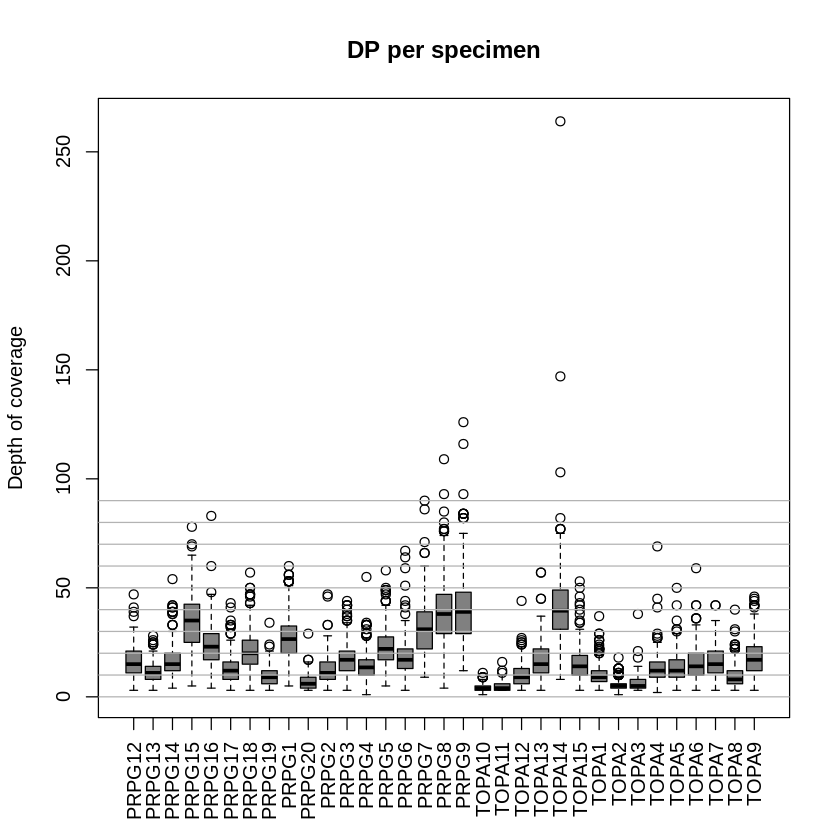

In [43]:
boxplot(x=Euschistus.90.vcf.dp, col="#808080", ylab="Depth of coverage",las=3)
title("DP per specimen")
abline(h=seq(from=0, to=90, by=10), col="#b3b3b3")

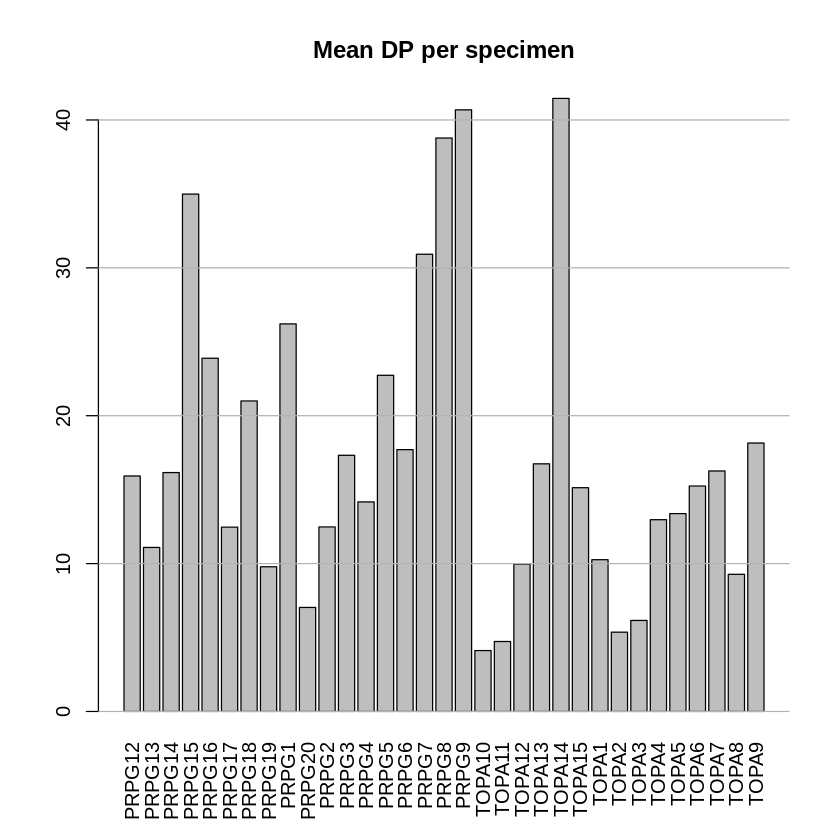

In [44]:
barplot(apply(X=Euschistus.90.vcf.dp, MARGIN=2, FUN=mean, na.rm=TRUE),las=3)
title("Mean DP per specimen")
abline(h=seq(from=0, to=60, by=10), col="#b3b3b3")

The heatmap is the best way to spot bad samples, in this case, TOPA10 and TOPA11. We can also visualize loci poorly represented across samples 

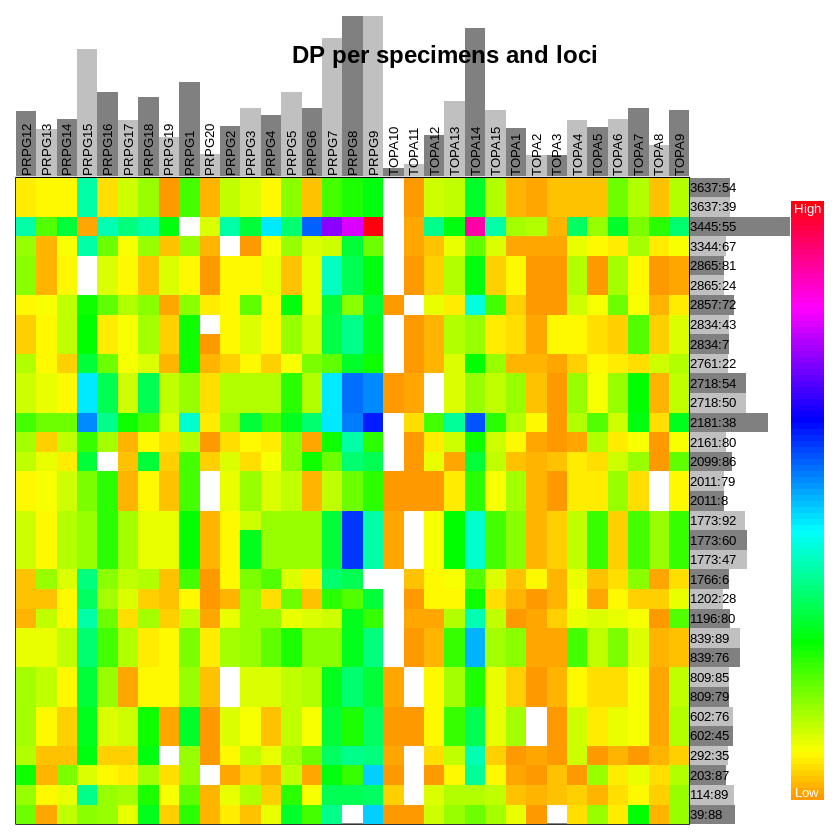

In [13]:
heatmap.bp(x=Euschistus.90.vcf.dp[1:33,1:33], col.ramp=rainbow(n=100,
                  start=0.1)) # Subset - only first 100 loci and individuals
                  title("DP per specimens and loci")

## 3. Convert to the proper format

### 3.1. Convert to *genind*

The objects of class genind contain individual genotypes. **tab** matrix of genotypes, in rows, for all alleles, in columns. Values are frequency: '0' if the genotype does not have the corresponding allele, '1' for an homozygote and 0.5 for an heterozygte. Rows and columns are given generic names.

We can extract information such as **pop.nall** (number of alleles per population), **NA.perc** percentage of  issing data, **Hobs** observed heterozygosity, **Hexp** expected heterozygosity for the genind object.

In [16]:
# Genind
Euschistus.90.genind <- vcfR2genind(x=euschistus.090.vcf)

In [45]:
# Remove sample with excess of missing
Euschistus.90.genind.clean <- Euschistus.90.genind[indNames(Euschistus.90.genind) != "TOPA10"]
Euschistus.90.genind.clean <- Euschistus.90.genind[indNames(Euschistus.90.genind) != "TOPA11"]

In [46]:
Euschistus.90.genind.clean

/// GENIND OBJECT /////////

 // 32 individuals; 383 loci; 766 alleles; size: 308.1 Kb

 // Basic content
   @tab:  32 x 766 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 766 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 14-18)

In [47]:
nInd(Euschistus.90.genind.clean)
indNames(Euschistus.90.genind.clean)
nLoc(Euschistus.90.genind.clean)
head(locNames(Euschistus.90.genind.clean))

[1] 32

[1] "PRPG12" "PRPG13" "PRPG14" "PRPG15" "PRPG16" "PRPG17" "PRPG18" "PRPG19"
 [9] "PRPG1"  "PRPG20" "PRPG2"  "PRPG3"  "PRPG4"  "PRPG5"  "PRPG6"  "PRPG7" 
[17] "PRPG8"  "PRPG9"  "TOPA10" "TOPA12" "TOPA13" "TOPA14" "TOPA15" "TOPA1" 
[25] "TOPA2"  "TOPA3"  "TOPA4"  "TOPA5"  "TOPA6"  "TOPA7"  "TOPA8"  "TOPA9"

[1] 383

[1] "39:88"  "114:89" "203:87" "292:35" "602:45" "602:76"

We can include the information of the sample location (i.e., "putative populations") including it in separated slops of the genind file. **pop** slot will contain factor giving the population of each individual and **pop.names** is a vector giving the real names of the populations.

In [49]:
popmap <- read.table("./090/popmap.txt", header = FALSE, sep = "", dec = ".")
pop(Euschistus.90.genind)<- as.factor(t(popmap))
#tail(popmap)

### 3.1. Convert to *genlight*


The class genlight is also S4 class for storing a genotypes of binary SNPs in a compact way. This format is preferable for larger dataset. genlight suitable for huge data, not required now. On Linux/Mac we can use the **n.cores** option to engage more cores for the processing

In [21]:
euschistus.090.genlight <- vcfR2genlight(x=euschistus.090.vcf, n.cores=10)
euschistus.090.genlight 

 /// GENLIGHT OBJECT /////////

 // 33 genotypes,  383 binary SNPs, size: 102.9 Kb
 536 (4.24 %) missing data

 // Basic content
   @gen: list of 33 SNPbin

 // Optional content
   @ind.names:  33 individual labels
   @loc.names:  383 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @other: a list containing: elements without names 


* Loci format

In [22]:
# Loci
euschistus.090.loci <- vcfR2loci(x=euschistus.090.vcf)
# Check it
head(euschistus.090.loci)

,39:88,114:89,203:87,292:35,602:45,602:76,809:79,809:85,839:76,839:89,⋯,55682:28,66080:88,66710:8,66875:19,67959:27,69593:56,70683:33,86660:44,485105:12,485105:33
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
PRPG12,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/1,0/1,⋯,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1
PRPG13,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,⋯,0/0,0/0,0/1,0/0,1/1,0/0,1/1,0/0,1/1,1/1
PRPG14,0/1,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,⋯,0/0,0/0,0/0,0/0,0/0,0/0,1/1,0/0,0/0,NA
PRPG15,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,⋯,0/1,0/0,1/1,0/0,0/0,0/0,1/1,0/0,0/0,0/0
PRPG16,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,⋯,0/0,0/0,0/1,0/1,0/0,0/0,0/1,0/0,0/0,0/0
PRPG17,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,⋯,0/1,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


## Description

* Descriptive  I
* Get summary - names and sizes of populations, heterozygosity, some info about loci

In [23]:
Euschistus.90.summ <- summary(Euschistus.90.genind)

* Plot expected vs. observed heterozygosity

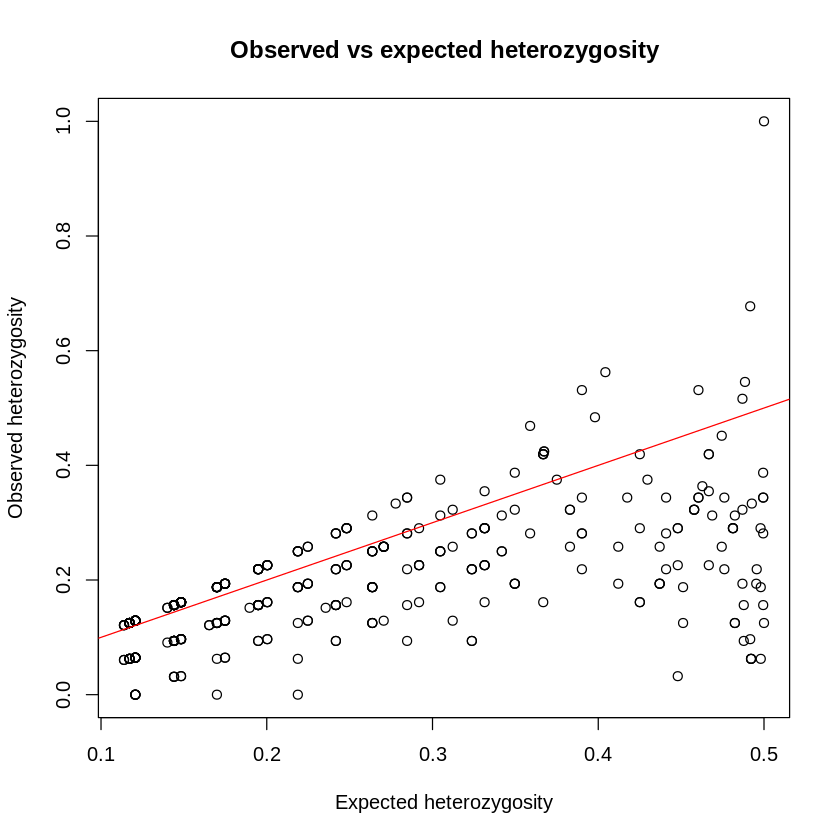

In [24]:
plot(x=Euschistus.90.summ$Hexp, y=Euschistus.90.summ$Hobs,
       main="Observed vs expected heterozygosity",
       xlab="Expected heterozygosity", ylab="Observed heterozygosity")
       abline(0, 1, col="red")

* Bartlett's K-squared test of difference

Bartlett's test (see Snedecor and Cochran, 1989) is used to test if k samples are from populations with equal variances. Equal variances across populations is called homoscedasticity or homogeneity of variances.

Here, Bartlett’s test is used to identify variance heterogeneity  between  expected and observed heterogeneity.  This  tests  for  deviation  from  the  null hypothesis  that  the  variance  in  of the two estimates is equal between groups. In this approach, homozygous and heterozygous were compared using thebartlett.test function  in  the *stats* R-package. 


In [25]:
bartlett.test(list(Euschistus.90.summ$Hexp, Euschistus.90.summ$Hobs))


	Bartlett test of homogeneity of variances

data:  list(Euschistus.90.summ$Hexp, Euschistus.90.summ$Hobs)
Bartlett's K-squared = 4.1925, df = 1, p-value = 0.0406


* T-test of difference between
* observed and expected heterozygosity
* It is important to taking into account the multiple comparisons and establish a lower threshold for p (i.e., Bonferroni  adjustment  for  multiple  testing.) 

In [26]:
t.test(x=Euschistus.90.summ$Hexp, y=Euschistus.90.summ$Hobs, paired=TRUE, var.equal=T)


	Paired t-test

data:  Euschistus.90.summ$Hexp and Euschistus.90.summ$Hobs
t = 10.938, df = 382, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04757007 0.06841956
sample estimates:
mean of the differences 
             0.05799481 


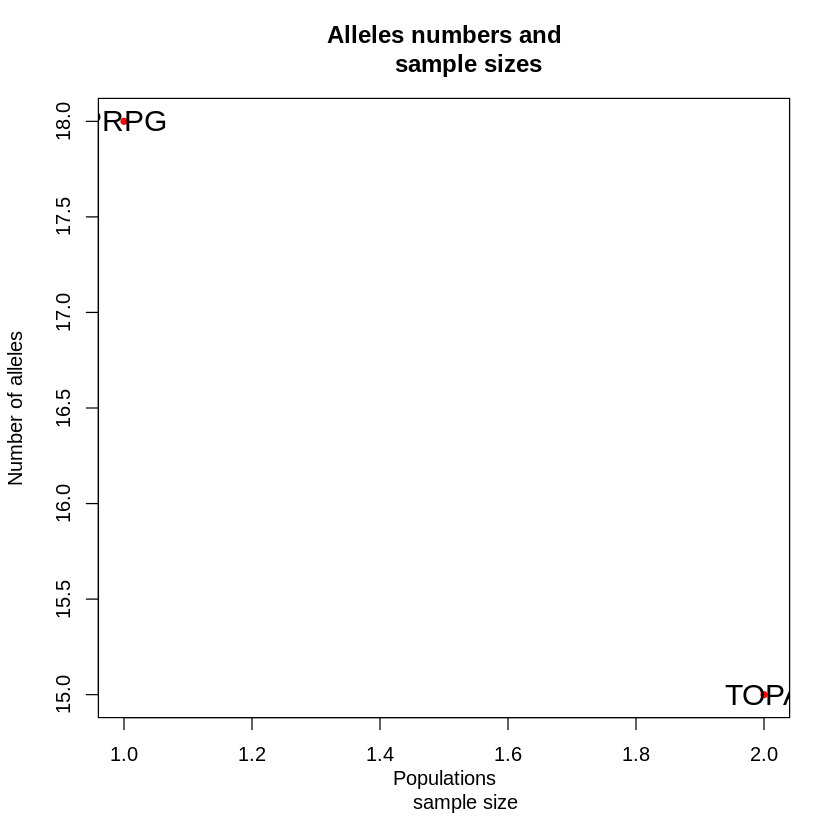

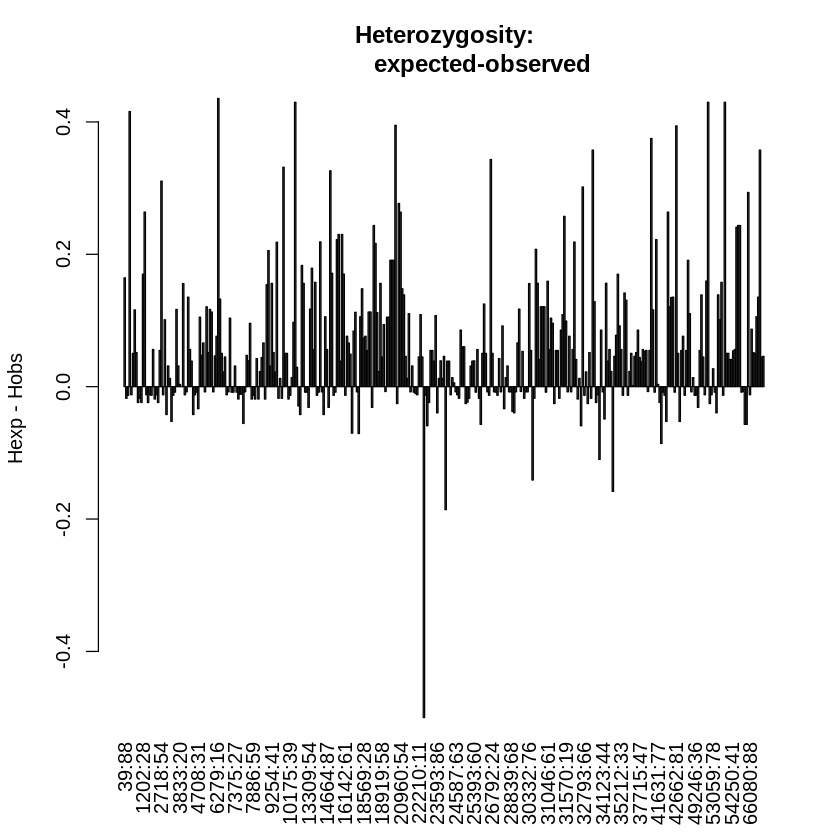

In [27]:
# Create pane with some information
#par(mfrow=c(2, 2)) # Divide graphical devices into 4 smaller spaces
# Plot alleles number vs. population sizes
plot(x=Euschistus.90.summ$n.by.pop, y=Euschistus.90.summ$pop.nall, xlab="Populations
       sample size", ylab="Number of alleles", main="Alleles numbers and
       sample sizes", col="red", pch=20)

#barplot(height=Euschistus.90.summ$pop.nall, names=as.factor(Euschistus.90.summ$n.by.pop), col=rgb(0.2,0.4,))

# Add text description to the point
text(x=Euschistus.90.summ$n.by.pop, y=Euschistus.90.summ$pop.nall,
       lab=names(Euschistus.90.summ$n.by.pop), cex=1.5)


# Barplots of various data
barplot(height=Euschistus.90.summ$Hexp - Euschistus.90.summ$Hobs, main="Heterozygosity:
           expected-observed", ylab="Hexp - Hobs", las=3)

#barplot(height=Euschistus.90.summ["n.by.pop"], main="Sample sizes per
#           population", ylab="Number of genotypes", las=3)

In [28]:
Euschistus.90.summ$n.by.pop

PRPG TOPA 
  18   15

* **poppr** This function allows the user to quickly view indices of heterozygosity, evenness, and linkage toaid in the decision of a path to further analyze a specified dataset

#### The index of association (Ia and rbarD)

The index of association is a calculation based on the ratio of the variance of the raw number of differences between individuals and the sum of those variances over each locus . You can also think of it as the observed variance over the expected variance. If they are the same, then the index is zero after subtracting one. In the calculation, phase is not considered, and any difference increases the distance between two individuals

In [29]:
poppr(dat=Euschistus.90.genind, total=TRUE, sample=1000, method=4,
      missing="geno", cutoff=0.15, quiet=FALSE, clonecorrect=FALSE,
      plot=TRUE, index="rbarD", minsamp=1, legend=TRUE)     


-------------------------------------------------------------------------|
Pop     = Population name (Total == Pooled)
N       = Census population size
MLG     = Number of unique multilocus genotypes (MLG) observed
eMLG    = Number of expected MLG based on rarefaction at smallest N >= 10
SE      = Standard error of rarefaction analysis
H       = Shannon-Wiener Index of MLG diversity
G       = Stoddart and Taylor's Index of MLG diversity
lambda  = Simpson's index
E.5     = Evenness
Hexp    = Nei's 1978 expected heterozygosity
Ia      = Index of association
rbarD   = Standardized index of association
-------------------------------------------------------------------------|




Standardized index of association, rd as the measure of multilocus genotypic linkage disequilibrium (LD). The observed rd for each lineage falls within the distribution expected under free recombination (dotted blue line). P < 0.01 indicates significant LD (at 99.9% level). N, number of unique haplotypes.

## HWE test

* HWE test by loci

In [ ]:
# According to loci
euschistus.090.hwe.test <- hw.test(x=euschistus.090.loci, B=1000)
head(euschistus.090.hwe.test)

In [70]:
euschistus.pops <- seppop(Euschistus.90.genind)
euschistus.pops

$PRPG
/// GENIND OBJECT /////////

 // 18 individuals; 383 loci; 766 alleles; size: 265.7 Kb

 // Basic content
   @tab:  18 x 766 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 766 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, pop = ..1, treatOther = ..2, quiet = ..3, 
    drop = drop)

 // Optional content
   @pop: population of each individual (group size range: 18-18)

$TOPA
/// GENIND OBJECT /////////

 // 15 individuals; 383 loci; 766 alleles; size: 256.5 Kb

 // Basic content
   @tab:  15 x 766 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 766 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: .local(x = x, i = i, j = j, pop = 

* Convert genind back to loci (list of loci objects according to populations)

In [71]:
euschistus.pops.loci <- lapply(X=euschistus.pops, FUN=genind2loci)
# Calculate the results per populations
lapply(X=euschistus.pops.loci, FUN=hw.test, B=1000)

,chi^2,df,Pr(chi^2 >),Pr.exact
39:88,0.50535077,1,0.47715843,1.000
114:89,0.14876033,1,0.69972286,1.000
203:87,0.06640625,1,0.79664300,1.000
292:35,0.00000000,0,1.00000000,1.000
602:45,0.00000000,0,1.00000000,1.000
602:76,0.01469388,1,0.90351813,1.000
809:79,0.00000000,0,1.00000000,1.000
809:85,0.00000000,0,1.00000000,1.000
839:76,0.28125000,1,0.59588309,1.000
839:89,0.14876033,1,0.69972286,1.000


# PCA

* Simple PCA
* Impute missing data using averages

In [30]:
X <- tab(Euschistus.90.genind, NA.method="mean") 

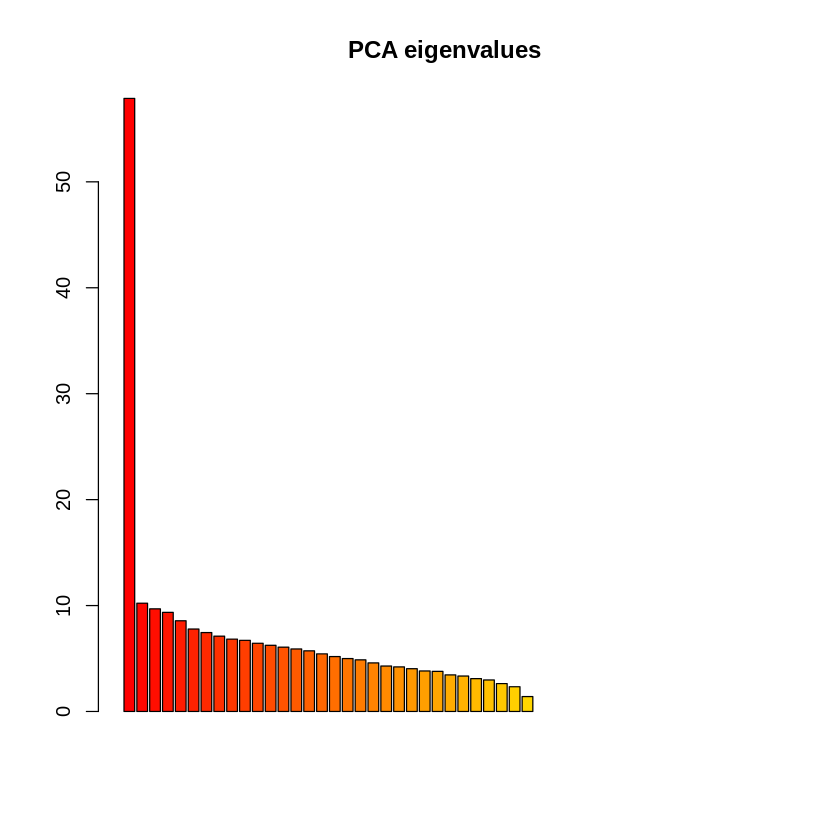

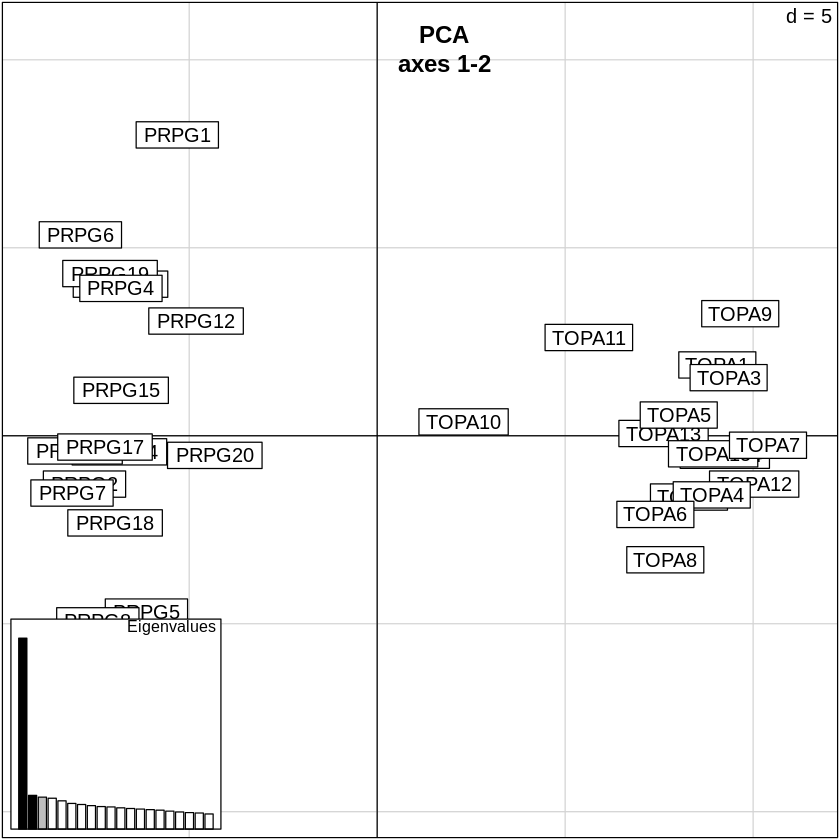

In [31]:
pca1 <- dudi.pca(X,scannf=FALSE,scale=FALSE)
temp <- as.integer(pop(Euschistus.90.genind))
myCol <- transp(rainbow(16),.8)[temp]
#plot(pca1$li, col=myCol, cex=3, pch=16)
barplot(pca1$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

s.label(pca1$li)
title("PCA\naxes 1-2")
add.scatter.eig(pca1$eig[1:20], 3,1,2)

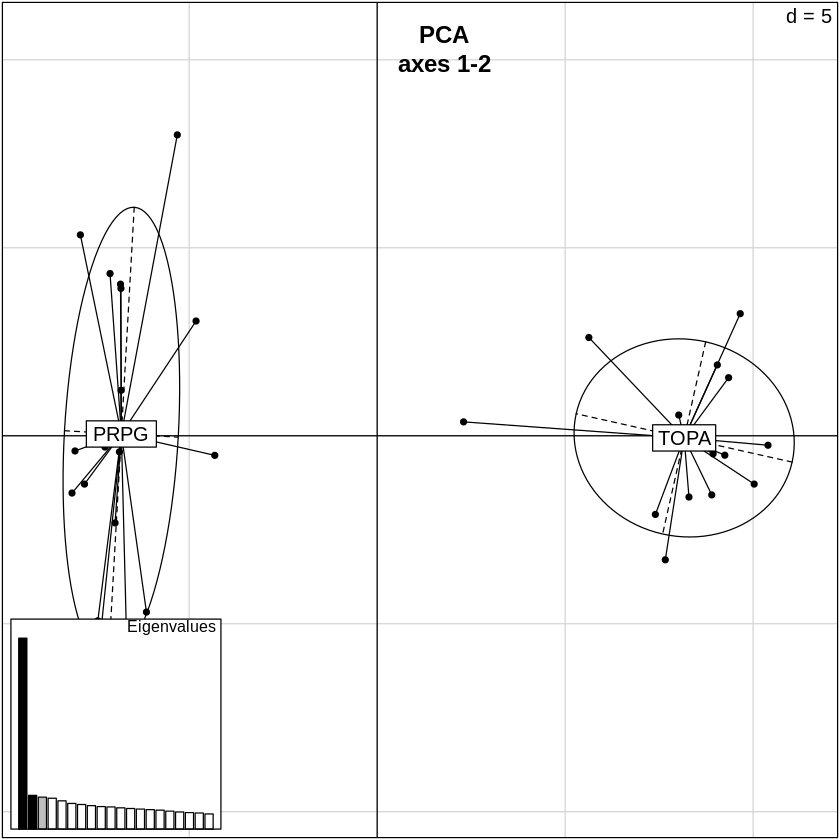

In [32]:
s.class(pca1$li, pop(Euschistus.90.genind))
title("PCA\naxes 1-2")
add.scatter.eig(pca1$eig[1:20], 3,1,2)


[1] 25.559456  4.513747  4.278118  4.131883  3.781611  3.436401

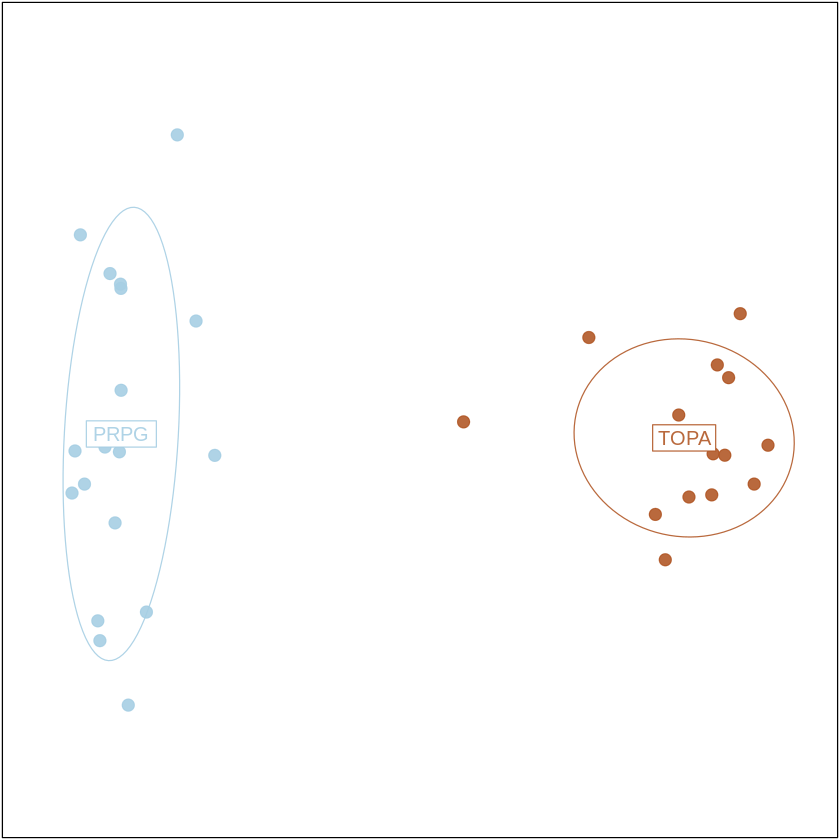

In [33]:
col <- funky(2)
s.class(pca1$li, pop(Euschistus.90.genind), col=transp(col,.9), axesell=FALSE,cstar=0, cpoint=2, grid=FALSE, addaxes = FALSE)


eig.perc <- 100*pca1$eig/sum(pca1$eig)
head(eig.perc)

## Phylogeny trees

In [34]:
X <- scaleGen(Euschistus.90.genind, NA.method="mean")
D <- dist(X)
tre <- nj(D)
myCol=rainbow(2)[as.integer(pop(Euschistus.90.genind))]

Warning message in .local(x, ...):
“Some scaling values are null.
 Corresponding alleles are removed.”


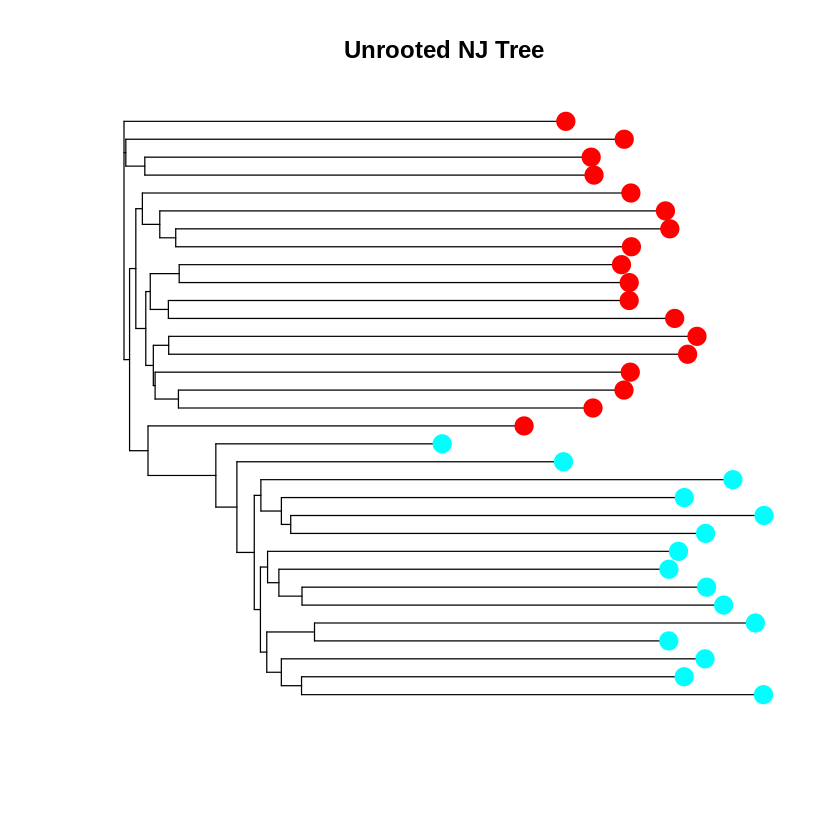

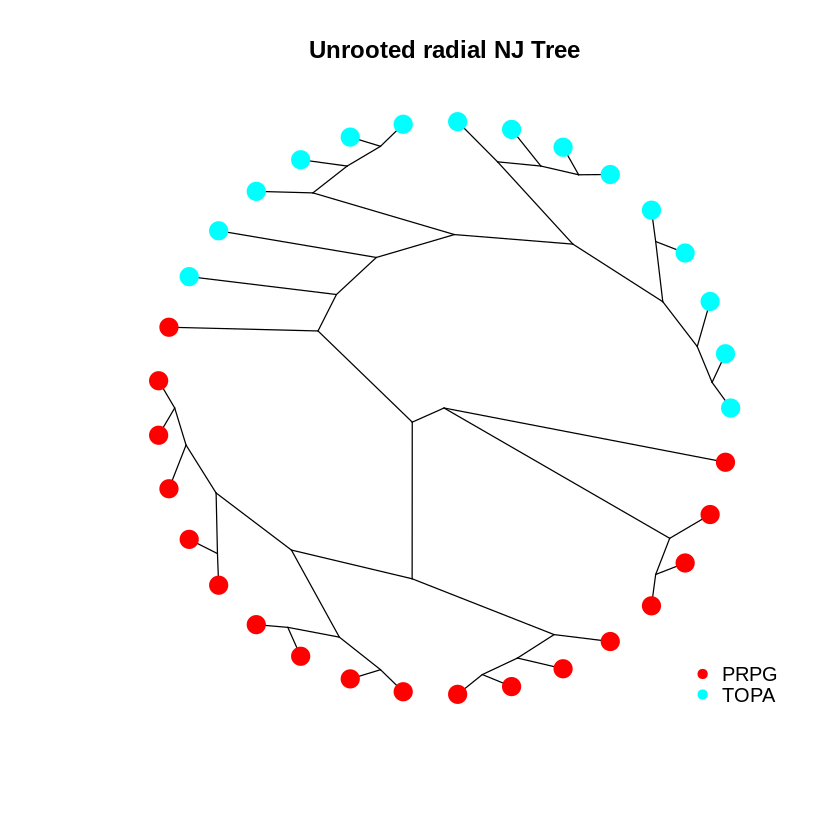

In [35]:
tre <- ladderize(tre)
plot(tre,show.tip.lab = FALSE)
tiplabels(col = myCol, pch = 19, cex=2)
title("Unrooted NJ Tree")
#legend("bottomright", pch = 19, col=rainbow(2, alpha = 1), 
#           legend = c("PRPG", "TOPA"), 
#           cex=2, bty="n",y.intersp=0.8, ncol=2)


plot(tre, type = "radial" , show.tip.lab = FALSE)
tiplabels(col = myCol, pch = 19, cex=2)
title("Unrooted radial NJ Tree")
legend("bottomright", pch = 19, col=rainbow(2, alpha = 1), legend = c("PRPG", "TOPA"), cex=1, bty="n",y.intersp=0.8)

"average method" is used for UPGMA, members can be equal to NULL or a vector with a length of size D

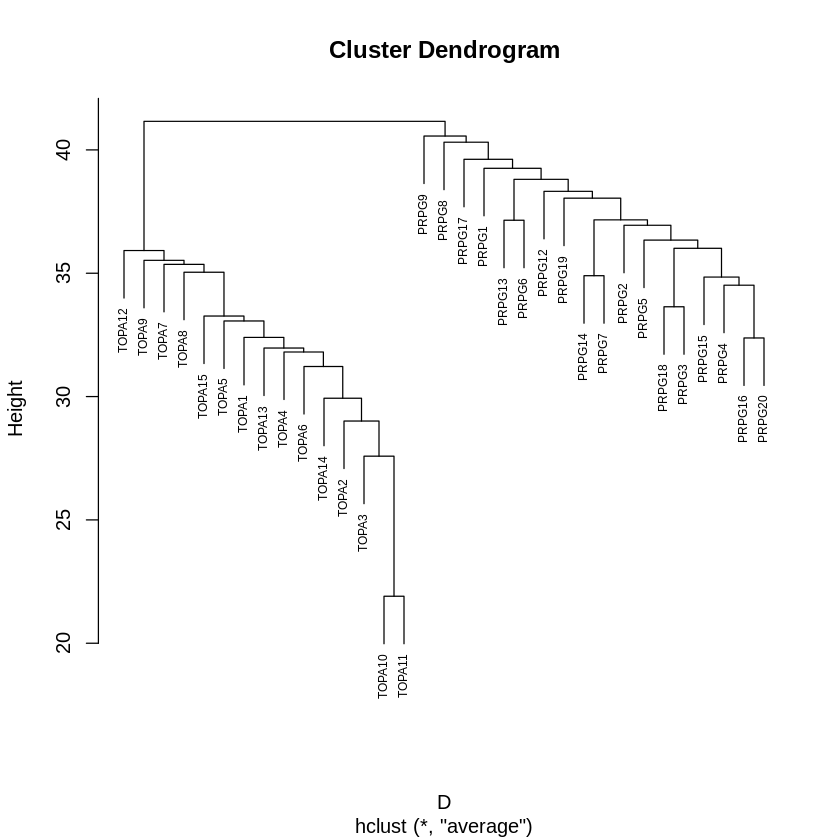

In [98]:
h_cluster <- hclust(D, method = "average", members = NULL)
plot(h_cluster, cex = 0.6)

## FST calculations

In [100]:
Euschistus.fst.nei = genet.dist(Euschistus.90.genind,method="Nei87")
Euschistus.fst.nei

       PRPG
TOPA 0.2523

In [101]:
Euschistus.fst.wc = genet.dist(Euschistus.90.genind,method="WC84")
Euschistus.fst.wc

          PRPG
TOPA 0.2495906

In [107]:
obj2 = gi2gl(Euschistus.90.genind, parallel = TRUE, verbose = NULL)

Starting gi2gl 


Loading required package: parallel



Completed: gi2gl 


In [108]:
Euschistus.fst <- stamppFst(obj2, nboots = 10, percent = 95, nclusters = 20)

In [109]:
Euschistus.fst 

$Fsts
          PRPG TOPA
PRPG        NA   NA
TOPA 0.2495906   NA

$Pvalues
     PRPG TOPA
PRPG   NA   NA
TOPA    0   NA

$Bootstraps
  Population1 Population2         1         2         3         4         5
1        PRPG        TOPA 0.2302502 0.2320831 0.2345411 0.2393302 0.2393484
         6         7         8         9        10 Lower bound CI limit
1 0.247637 0.2484191 0.2515019 0.2633914 0.2739086            0.2302502
  Upper bound CI limit p-value       Fst
1            0.2633914       0 0.2495906

## BAYESCAN

The method has been implemented in C++ and there are command-line versions for all operating systems (OS X, Lynux, and Windows). There is a GUI version only available for Windows users. Here is presented only the command-line version. 

### Input files

The best approach is to prepare files from structure (.str), genpop, VCF (.vcf) format output from STACKS. Then use PGDSpider http://www.cmpg.unibe.ch/software/PGDSpider/ to convert them into GESTE/BayScan format.

Type the following command in your Linux terminal to convert STACKS genepop output file into GESTE, Bayescan output. 

>java -Xmx1024m -Xms512m -jar /home/erick/Programs/PGDSpider_2.1.1.5/PGDSpider2-cli.jar \
>     -inputfile  ./085/populations.snps.genepop -inputformat GENEPOP   \
>     -outputfile ./BayeScan/Bayescan_2985_markers -outputformat GESTE   \
>     -spid /home/erick/Programs/PGDSpider_2.1.1.5/Genepop_BayeScan.spid

### Output files

Different files types can be produced by Bayescan, but by default we will see are:

**\*_Verif.txt:** you should use this file in order to verify that bayescenv read the input files properly. 

**\*.sel:** provide the trace of some of the parameters estimated by the model. This include the loglikelihood and the local population Fst’s. This file is used to verify convergence of the chain.

**\*_fst.txt:** this file is used to interpret the results. In other words,identify the outlier loci. 

We should perform long runs that will increase chances of convertion and generate more reliable results. The choice of a good *prior odd* is critical and should be carefully selected (i.e., *prior odds* = 10) for a dataset of around 1000 SNPs so the number of false positives is likely to be large unless we use a very stringent FDR threshold.


Still in the command line, they the following command to run Bayescan

>/home/erick/Programs/BayeScan2.1/source/bayescan_2.1  ./BayeScan/Bayescan_2985_markers  
>                               -o ./BayeScan/Bayescan_2985_output_10_n_5000       
>                               -n 5000                                  
>                               -thin 10                                 
>                               -nbp  20                                  
>                               -pilot 5000                                 
>                               -burn  50000                                
>                               -pr_odds 10                                 
>                               -threads 20

In [32]:
theme_set(theme(panel.background = element_blank(),panel.border=element_rect(fill=NA),panel.grid.major = element_blank(),panel.grid.minor = element_blank(),strip.background=element_blank(),axis.text.x=element_text(colour="black"),axis.text.y=element_text(colour="black"),axis.ticks=element_line(colour="black"),plot.margin=unit(c(1,1,1,1),"line")))
cbPalette <- c("#999999", "#E69F00", "#56B4E9")

Input Bayescan output and a file with markers IDs

In [35]:
bayescan=read.table("./BayeScan/Bayescan_2985_output_10_n_5000_fst.txt")
SNPb=read.table("./085/markers_2985",header=F)
bayescan=cbind(SNPb, bayescan)

In [38]:
class(bayescan$qval)
bayescan$qval <- as.numeric(bayescan$qval)
bayescan[bayescan$qval<=0.0001,"qval"]=0.0001

bayescan$prob <- (round(bayescan$prob, 4))
bayescan$log10.PO. <- (round(bayescan$log10.PO., 4))
bayescan$qval <- (round(bayescan$qval, 4))
bayescan$alpha <- (round(bayescan$alpha, 4))
bayescan$fst <- (round(bayescan$fst, 6))

[1] "numeric"

Here we separate markers putatively under selection (diversifying and positive) from neutral markers using $q-val < 0.05$ and $alpha > 0$ criteria

In [39]:
# ADD a column for selection grouping
bayescan$SELECTION <- ifelse(bayescan$alpha>=0&bayescan$qval<=0.05,"diversifying",ifelse(bayescan$alpha>=0&bayescan$qval>0.05,"neutral","balancing"))
bayescan$SELECTION<- factor(bayescan$SELECTION)
levels(bayescan$SELECTION)

[1] "balancing"    "diversifying" "neutral"

Writing out putative makers in separate files

In [40]:
positive <- bayescan[bayescan$SELECTION=="diversifying",]
neutral <- bayescan[bayescan$SELECTION=="neutral",]
balancing <- bayescan[bayescan$SELECTION=="balancing",]
xtabs(data=bayescan, ~SELECTION)
write.table(neutral, "neutral.txt", row.names=F, quote=F)
write.table(balancing, "balancing.txt", row.names=F, quote=F)
write.table(positive, "positive.txt", row.names=F, quote=F)

SELECTION
   balancing diversifying      neutral 
        1610           10         1365 

In [41]:
#Transformation Log for the graph
bayescan$log10_Q <- log10(bayescan$qval)

In [42]:
#Quantile of FST
FST_quantile<-quantile(bayescan$fst,c(0,0.2,0.4,0.6,0.8,1.0),na.rm="true")
bayescan$FST_GROUP <- cut(bayescan$fst, FST_quantile,labels=c("0-20%", "20-40%", "40-60%", "60-80%", "80-100%"))

In [43]:
# Grouping des groupes LOG10_PO
bayescan$PO_GROUP <- ifelse(bayescan$log10.PO.>2,"decisive",ifelse(bayescan$log10.PO.>1.5,"very_strong",ifelse(bayescan$log10.PO.>1,"strong",ifelse(bayescan$log10.PO.>0.5,"substantial","no_evidence"))))
bayescan$PO_GROUP<- factor(bayescan$PO_GROUP)
levels(bayescan$PO_GROUP)
class(bayescan$PO_GROUP)
bayescan[["PO_GROUP"]] <- factor(bayescan[["PO_GROUP"]],levels=c("no evidence","substantial","strong","very strong","decisive"),ordered=T)
levels(bayescan$PO_GROUP)

[1] "no_evidence" "strong"      "substantial" "very_strong"

[1] "factor"

[1] "no evidence" "substantial" "strong"      "very strong" "decisive"

In [44]:
xtabs(data=bayescan, ~PO_GROUP)

PO_GROUP
no evidence substantial      strong very strong    decisive 
          0           3           5           0           0 

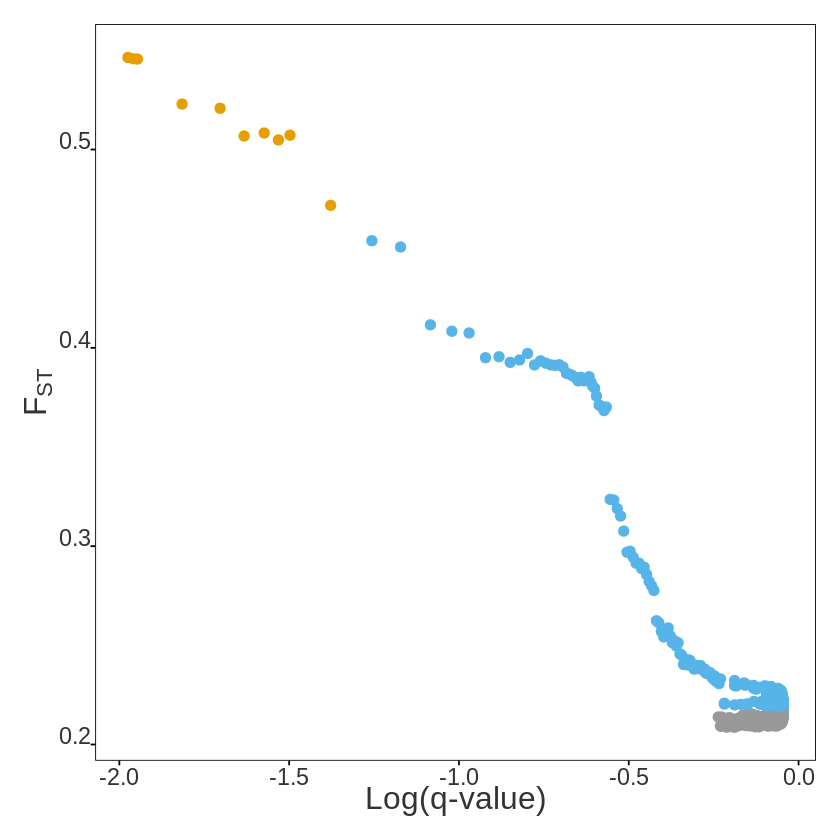

In [45]:
x_title="Log(q-value)"
y_title= expression('F'['ST'])

graph_1<-ggplot(bayescan, mapping = aes(x=log10_Q,y=fst)) +
  geom_point(aes(fill=factor(SELECTION), colour=SELECTION), pch=19, size=2.5)+
  scale_color_manual(values=cbPalette) +
  ylab(expression('F'['ST'])) + 
  xlab("Log(q-value)") +
  theme(axis.text.x = element_text(color = "grey20", size = 14, angle = 0),
        axis.text.y = element_text(color = "grey20", size = 14, angle = 0, hjust = 1, vjust = 0, face = "plain"),  
        axis.title.x = element_text(color = "grey20", size = 19, angle = 0, hjust = .5, vjust = 1, face = "plain"),
        axis.title.y = element_text(color = "grey20", size = 19, angle = 90, hjust = .5, vjust = 1, face = "plain"),
        legend.position = "none")
graph_1
ggsave("Euschistus.tiff", dpi=300, width=9, height=5)